In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
%matplotlib inline

In [2]:
# Reading whale returns
algo_whale = Path("Resources/whale_returns.csv")
whale = pd.read_csv(algo_whale, index_col="Date", infer_datetime_format=True, parse_dates=True) 

In [3]:
# Count nulls
whale.isnull().count()

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64

In [4]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [6]:
daily_return_whale = whale.pct_change
daily_return_whale

<bound method NDFrame.pct_change of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-25                  -0.000285           -0.001291   
2019-04-26                   0.008149            0.009162   
2019-04-29                   0.001254            0.002719   
2019-04-30                  -0.001295           -0.002211   
2019-05-01                  -0.005847           -0.001341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          Na

In [7]:
# Reading algorithmic returns
algo = Path("Resources/algo_returns.csv")
Algo = pd.read_csv(algo, index_col="Date", infer_datetime_format=True, parse_dates=True)

In [8]:
# Count nulls
Algo.isnull()

,Algo 1,Algo 2
Date,,
2014-05-28,False,True
2014-05-29,False,True
2014-05-30,False,True
2014-06-02,False,True
2014-06-03,False,True
...,...,...
2019-04-25,False,False
2019-04-26,False,False
2019-04-29,False,False


In [9]:
Algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [10]:
# Drop nulls
Algo.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [11]:
daily_return_Algo= Algo.pct_change
daily_return_Algo

<bound method NDFrame.pct_change of               Algo 1    Algo 2
Date                          
2014-05-28  0.001745       NaN
2014-05-29  0.003978       NaN
2014-05-30  0.004464       NaN
2014-06-02  0.005692       NaN
2014-06-03  0.005292       NaN
...              ...       ...
2019-04-25  0.000682 -0.007247
2019-04-26  0.002981  0.005256
2019-04-29  0.005208  0.002829
2019-04-30 -0.002944 -0.001570
2019-05-01  0.000094 -0.007358

[1241 rows x 2 columns]>

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [12]:
# Reading S&P 500 Closing Prices
sp500 = Path("Resources/sp500_history.csv")
SP500 = pd.read_csv(sp500, index_col="Date", infer_datetime_format=True, parse_dates=True)
SP500 = SP500.sort_index()
SP500.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [13]:
# Check Data Types
SP500.dtypes

Close    object
dtype: object

In [14]:
# Fix Data Types
SP500["Close"]=SP500["Close"].str.replace("$","").astype("float")

#SP500['Close'] = SP500['Close'].str[1:]
#SP500['Close'] =pd.to_numeric(SP500['Close'])

C:\ProgramData\Anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


In [15]:
# Calculate Daily Returns
daily_return_SP500 = SP500.pct_change()
daily_return_SP500

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


In [16]:
# Drop nulls
daily_return_SP500 = daily_return_SP500.dropna()

In [17]:
# Rename `Close` Column to be specific to this portfolio.
daily_return_SP500 = daily_return_SP500.rename(columns={'Close':'SP500'})
daily_return_SP500.head()

,SP500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


## Combine Whale, Algorithmic, and S&P 500 Returns

In [18]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
Combine_df = pd.concat([whale,Algo,daily_return_SP500], axis='columns', join='inner')
Combine_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

In [19]:
Combine_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

In [20]:
# Plot daily returns of all portfolios
Combine_daily_returns = Combine_df.pct_change
Combine_daily_returns

<bound method NDFrame.pct_change of             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
...                               ...                 ...   
2019-04-16                   0.002699            0.000388   
2019-04-17                  -0.002897           -0.006467   
2019-04-18                   0.001448            0.001222   
2019-04-22                  -0.002586           -0.007333   
2019-04-23                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-02      

<AxesSubplot:xlabel='Date'>

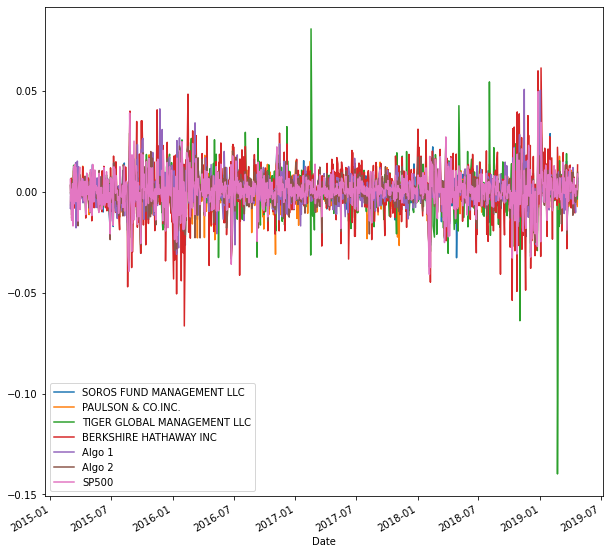

In [21]:
Combine_df.plot(figsize=(10,10))
#Combine_daily_returns.plot(figsize=(10,10))

#### Calculate and Plot cumulative returns.

In [22]:
# Calculate cumulative returns of all portfolios
cumulative_return = (1 + Combine_df).cumprod()
cumulative_return

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
Date,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,0.991842,1.003200,1.006125
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,1.001559
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.997163
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.998356
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.984205
...,...,...,...,...,...,...,...
2019-04-16,1.160965,0.786811,0.862080,1.526861,1.929123,1.271825,1.381354
2019-04-17,1.157602,0.781723,0.858279,1.531781,1.909251,1.265175,1.378213
2019-04-18,1.159278,0.782678,0.858778,1.534716,1.908128,1.263620,1.380390


<AxesSubplot:xlabel='Date'>

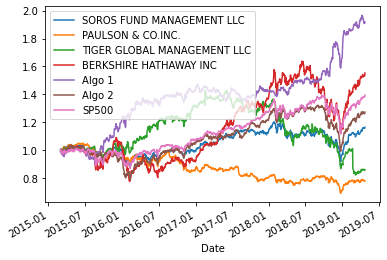

In [23]:
# Plot cumulative returns
cumulative_return.plot()

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

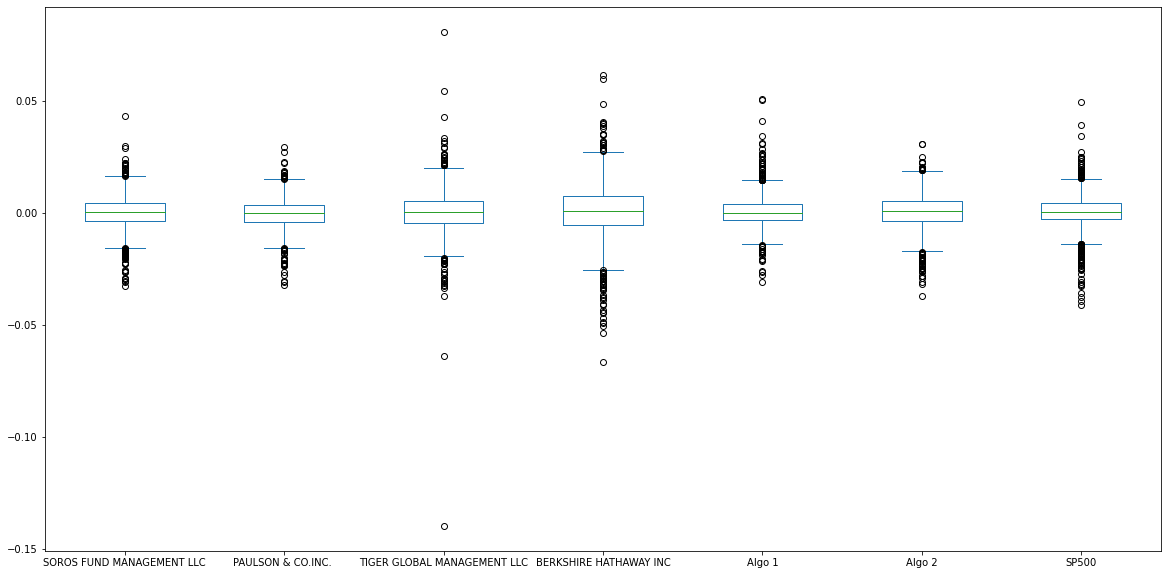

In [24]:
# Box plot to visually show risk
Combine_df.plot.box(figsize=(20,10))

### Calculate Standard Deviations

In [25]:
# Calculate the daily standard deviations of all portfolios
standard_deviation = Combine_df.std()
standard_deviation

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007621
Algo 2                         0.008339
SP500                          0.008551
dtype: float64

<AxesSubplot:>

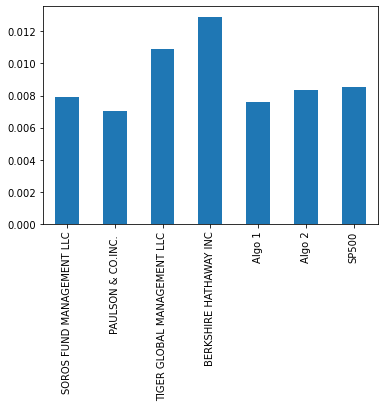

In [26]:
standard_deviation.plot.bar()

In [27]:
standard_deviation.sort_values(inplace= True)
standard_deviation.head()

PAULSON & CO.INC.            0.007023
Algo 1                       0.007621
SOROS FUND MANAGEMENT LLC    0.007895
Algo 2                       0.008339
SP500                        0.008551
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [28]:
# Calculate  the daily standard deviation of S&P 500
SP500_standard_deviation = SP500.std()
SP500_standard_deviation.head()



Close    402.122004
dtype: float64

In [29]:
# Determine which portfolios are riskier than the S&P 500
risk = (f"The first portfolio with high volatility is BERKSHIRE HATHAWAY INC which has a standard deviation of {standard_deviation['BERKSHIRE HATHAWAY INC']}. The second highest volatile portfolio is TIGER GLOBAL MANAGEMENT LLC, whith a standard deviation of {standard_deviation['TIGER GLOBAL MANAGEMENT LLC']}. These 2 are riskier than the SP500")
  
print(risk)

The first portfolio with high volatility is BERKSHIRE HATHAWAY INC which has a standard deviation of 0.012918618441883491. The second highest volatile portfolio is TIGER GLOBAL MANAGEMENT LLC, whith a standard deviation of 0.010893969618743005. These 2 are riskier than the SP500


### Calculate the Annualized Standard Deviation

In [30]:
# Calculate the annualized standard deviation (252 trading days)
Annualized_std = Combine_df.std()*np.sqrt(252)
Annualized_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
SP500                          0.135751
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

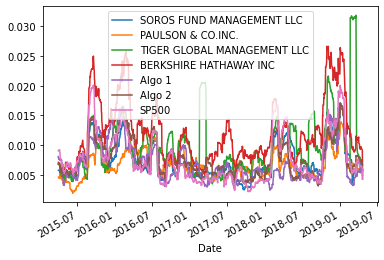

In [31]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling = Combine_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling.plot()

### Calculate and plot the correlation

In [32]:
# Calculate the correlation
correlation = Combine_df.corr()
correlation


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753
SP500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000


<AxesSubplot:>

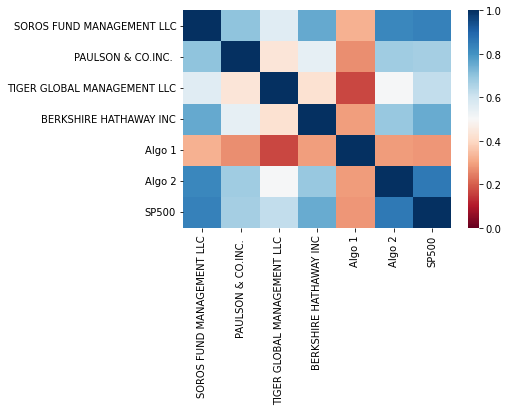

In [33]:
# Display de correlation matr
sns.heatmap(correlation, vmin=0, vmax=1, cmap='RdBu')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [34]:
# Calculate covariance of a single portfolio
covariance = Combine_df['Algo 1'].rolling(window=60).cov(Combine_df['SP500'])
covariance


Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-16    0.000001
2019-04-17    0.000003
2019-04-18    0.000003
2019-04-22    0.000003
2019-04-23    0.000003
Length: 1044, dtype: float64

In [35]:
# Calculate variance of S&P 500
variance_SP500 = Combine_df['SP500'].rolling(window=60).var()
variance_SP500


Date
2015-03-02         NaN
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
                ...   
2019-04-16    0.000041
2019-04-17    0.000037
2019-04-18    0.000037
2019-04-22    0.000037
2019-04-23    0.000037
Name: SP500, Length: 1044, dtype: float64

<AxesSubplot:xlabel='Date'>

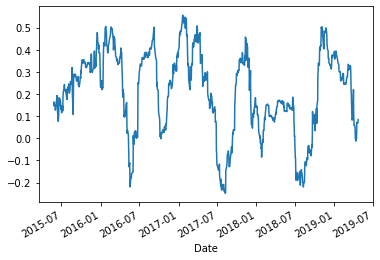

In [36]:
# Computing beta
beta = covariance/variance_SP500
#Plot beta trend
beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

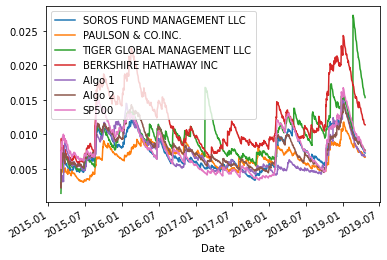

In [37]:
# Use `ewm` to calculate the rolling window
Expo_MW = Combine_df.ewm(halflife=21).std()
Expo_MW.plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Ratios
sharpe_ratios = (Combine_df.mean()*252)/(Combine_df.std()*np.sqrt(252))

<AxesSubplot:>

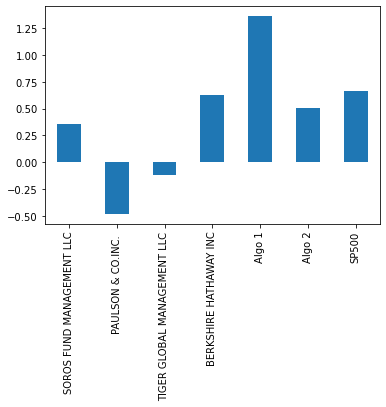

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes, did outperform

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [40]:
import pandas_datareader as web

In [41]:
# Reading data from 1st stock
ticker = ['AAPL']
apple_Stock = web.get_data_yahoo(ticker,
                                start = "2012-01-01",
                                end = "2019-12-30")
apple_Stock.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2012-01-03,12.540047,14.686786,14.732143,14.607143,14.621429,302220800.0
2012-01-04,12.607437,14.765714,14.810000,14.617143,14.642857,260022000.0
2012-01-05,12.747409,14.929643,14.948214,14.738214,14.819643,271269600.0
2012-01-06,12.880663,15.085714,15.098214,14.972143,14.991786,318292800.0
2012-01-09,12.860232,15.061786,15.276786,15.048214,15.196429,394024400.0


In [42]:
# Reading data from 2nd stock
ticker = ['TSLA']
TSLA_stock = web.get_data_yahoo(ticker,
                                start = '2012-01-01',
                                end = '2019-12-30')
TSLA_stock.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA
Date,,,,,,
2012-01-03,1.872000,1.872000,1.966667,1.843333,1.929333,13921500
2012-01-04,1.847333,1.847333,1.911333,1.833333,1.880667,9451500
2012-01-05,1.808000,1.808000,1.862000,1.790000,1.850667,15082500
2012-01-06,1.794000,1.794000,1.852667,1.760667,1.813333,14794500
2012-01-09,1.816667,1.816667,1.832667,1.741333,1.800000,13455000


In [43]:
# Reading data from 3rd stock
tickers = ['CCL']
CCL_stock = web.get_data_yahoo(tickers,
                               start = '2012-01-01',
                               end = '2019-12-30')
CCL_stock.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,CCL,CCL,CCL,CCL,CCL,CCL
Date,,,,,,
2012-01-03,25.530741,32.959999,33.750000,32.959999,33.470001,3483700.0
2012-01-04,25.732145,33.220001,33.349998,32.639999,33.200001,2952600.0
2012-01-05,25.770872,33.270000,33.360001,32.490002,32.919998,4499400.0
2012-01-06,25.492014,32.910000,33.150002,32.730000,33.150002,2980700.0
2012-01-09,25.623697,33.080002,33.119999,32.730000,33.060001,2898900.0


In [44]:
# Combine all stocks in a single DataFrame
stocks = pd.concat([apple_Stock,TSLA_stock,CCL_stock], axis = 'columns', join= 'inner')
stocks.head()

Attributes,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume,Adj Close,Close,High,Low,Open,Volume
Symbols,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,TSLA,TSLA,TSLA,TSLA,TSLA,TSLA,CCL,CCL,CCL,CCL,CCL,CCL
Date,,,,,,,,,,,,,,,,,,
2012-01-03,12.540047,14.686786,14.732143,14.607143,14.621429,302220800.0,1.872000,1.872000,1.966667,1.843333,1.929333,13921500,25.530741,32.959999,33.750000,32.959999,33.470001,3483700.0
2012-01-04,12.607437,14.765714,14.810000,14.617143,14.642857,260022000.0,1.847333,1.847333,1.911333,1.833333,1.880667,9451500,25.732145,33.220001,33.349998,32.639999,33.200001,2952600.0
2012-01-05,12.747409,14.929643,14.948214,14.738214,14.819643,271269600.0,1.808000,1.808000,1.862000,1.790000,1.850667,15082500,25.770872,33.270000,33.360001,32.490002,32.919998,4499400.0
2012-01-06,12.880663,15.085714,15.098214,14.972143,14.991786,318292800.0,1.794000,1.794000,1.852667,1.760667,1.813333,14794500,25.492014,32.910000,33.150002,32.730000,33.150002,2980700.0
2012-01-09,12.860232,15.061786,15.276786,15.048214,15.196429,394024400.0,1.816667,1.816667,1.832667,1.741333,1.800000,13455000,25.623697,33.080002,33.119999,32.730000,33.060001,2898900.0


In [45]:
stocks.dtypes

Attributes  Symbols
Adj Close   AAPL       float64
Close       AAPL       float64
High        AAPL       float64
Low         AAPL       float64
Open        AAPL       float64
Volume      AAPL       float64
Adj Close   TSLA       float64
Close       TSLA       float64
High        TSLA       float64
Low         TSLA       float64
Open        TSLA       float64
Volume      TSLA         int64
Adj Close   CCL        float64
Close       CCL        float64
High        CCL        float64
Low         CCL        float64
Open        CCL        float64
Volume      CCL        float64
dtype: object

In [46]:
# Reset Date index
Stocks1 = stocks.reset_index('Date')

In [47]:
# Reorganize portfolio data by having a column per symbol
Stock_df = stocks['Adj Close']
Stock_df.head()

Symbols,AAPL,TSLA,CCL
Date,,,
2012-01-03,12.540047,1.872000,25.530741
2012-01-04,12.607437,1.847333,25.732145
2012-01-05,12.747409,1.808000,25.770872
2012-01-06,12.880663,1.794000,25.492014
2012-01-09,12.860232,1.816667,25.623697


In [48]:
# Calculate daily returns
daily_returns_st = Stock_df.pct_change()
# Display sample data
daily_returns_st.head()

Symbols,AAPL,TSLA,CCL
Date,,,
2012-01-03,NaN,NaN,NaN
2012-01-04,0.005374,-0.013177,0.007889
2012-01-05,0.011102,-0.021292,0.001505
2012-01-06,0.010453,-0.007743,-0.010821
2012-01-09,-0.001586,0.012635,0.005166


In [49]:
# Drop NAs
daily_returns_st.isnull().sum()

Symbols
AAPL    1
TSLA    1
CCL     1
dtype: int64

In [50]:
daily_returns_st.dropna()

Symbols,AAPL,TSLA,CCL
Date,,,
2012-01-04,0.005374,-0.013177,0.007889
2012-01-05,0.011102,-0.021292,0.001505
2012-01-06,0.010453,-0.007743,-0.010821
2012-01-09,-0.001586,0.012635,0.005166
2012-01-10,0.003581,0.013578,0.012092
...,...,...,...
2019-12-23,0.016318,0.033605,0.020912
2019-12-24,0.000951,0.014384,-0.006243
2019-12-26,0.019840,0.013380,0.007656


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [51]:
# Set weights
weights = [1/3,1/3,1/3]

# Calculate portfolio return
portfolio_return = daily_returns_st * weights

In [52]:
portfolio_return.dropna()

Symbols,AAPL,TSLA,CCL
Date,,,
2012-01-04,0.001791,-0.004392,0.002630
2012-01-05,0.003701,-0.007097,0.000502
2012-01-06,0.003484,-0.002581,-0.003607
2012-01-09,-0.000529,0.004212,0.001722
2012-01-10,0.001194,0.004526,0.004031
...,...,...,...
2019-12-23,0.005439,0.011202,0.006971
2019-12-24,0.000317,0.004795,-0.002081
2019-12-26,0.006613,0.004460,0.002552


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [53]:
# Join your returns DataFrame to the original returns DataFrame
combine_stock = pd.concat([Combine_df,daily_returns_st], axis='columns', join='inner')
combine_stock

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
Date,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,-0.008158,0.003200,0.006125,0.004904,-0.029556,0.027279
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.002092,0.011301,-0.011064
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.006339,0.014432,-0.002237
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.016571,-0.008941,0.019735
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.001503,-0.033644,-0.023532
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000100,0.026203,0.019725
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.019473,-0.007792,-0.004744
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003594,0.007484,-0.016685


In [54]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combine_stock.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
Date,,,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,0.002092,0.011301,-0.011064
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,-0.006339,0.014432,-0.002237
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,-0.016571,-0.008941,0.019735
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,0.001503,-0.033644,-0.023532
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,0.004265,-0.015473,0.013288
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000100,0.026203,0.019725
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.019473,-0.007792,-0.004744
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.003594,0.007484,-0.016685


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [55]:
# Calculate the annualized `std`
combine_stock.std()*np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120987
Algo 2                         0.132374
SP500                          0.135751
AAPL                           0.246539
TSLA                           0.444553
CCL                            0.246072
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [56]:
# Calculate rolling standard deviation
rolling_std = combine_stock.rolling(window=21).std()
rolling_std

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
Date,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.006711,0.006224,0.007532,0.009731,0.005760,0.007053,0.006498,0.011931,0.027017,0.023249
2019-04-17,0.006773,0.006370,0.007574,0.009485,0.006229,0.007165,0.006537,0.012191,0.027022,0.023252
2019-04-18,0.006633,0.006303,0.007328,0.009475,0.005834,0.007172,0.006470,0.012146,0.026603,0.023408


<AxesSubplot:xlabel='Date'>

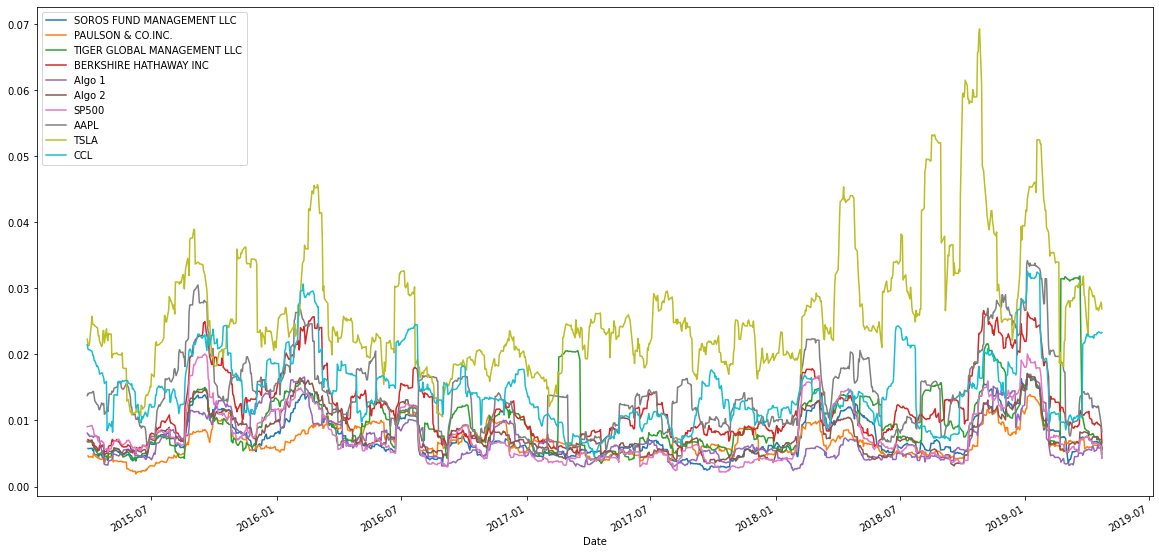

In [57]:
# Plot rolling standard deviation
rolling_std.plot(figsize=(20,10))

### Calculate and plot the correlation

In [58]:
# Calculate and plot the correlation
correlation = combine_stock.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.542427,0.359504,0.518446
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.415815,0.262367,0.390336
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.396136,0.245962,0.362954
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.569160,0.393400,0.498004
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505,0.198338,0.135403,0.164994
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753,0.542148,0.346721,0.504167
SP500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000,0.671259,0.378588,0.571146
AAPL,0.542427,0.415815,0.396136,0.569160,0.198338,0.542148,0.671259,1.000000,0.292735,0.381374
TSLA,0.359504,0.262367,0.245962,0.393400,0.135403,0.346721,0.378588,0.292735,1.000000,0.216497
CCL,0.518446,0.390336,0.362954,0.498004,0.164994,0.504167,0.571146,0.381374,0.216497,1.000000


<AxesSubplot:>

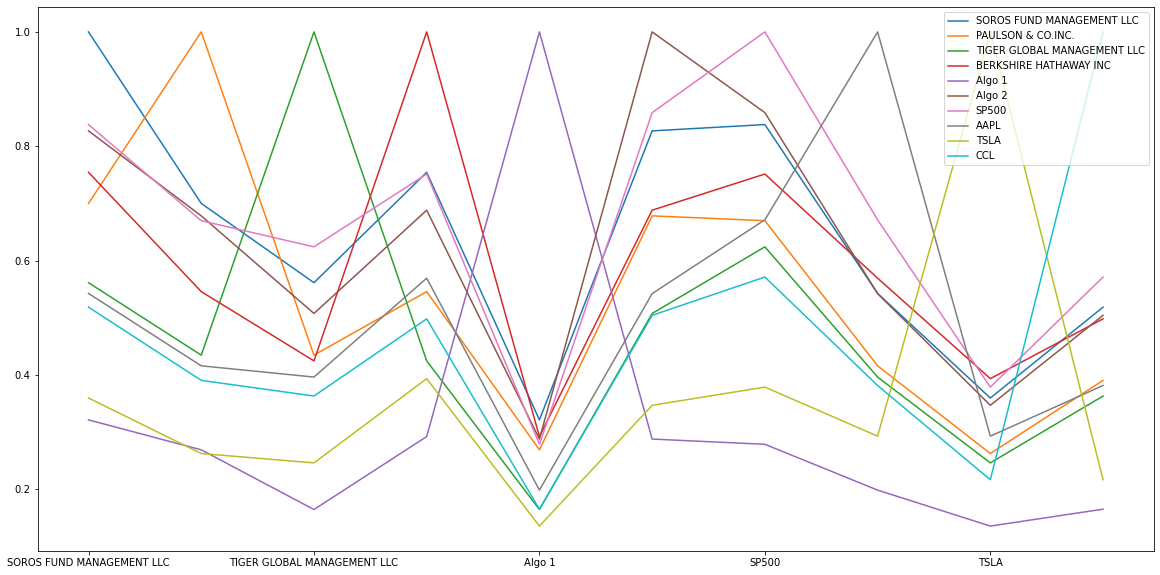

In [59]:
correlation.plot(figsize=(20,10))

In [60]:
correlation.style.background_gradient(cmap='bwr')

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864,0.542427,0.359504,0.518446
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732,0.415815,0.262367,0.390336
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946,0.396136,0.245962,0.362954
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371,0.569160,0.393400,0.498004
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.287650,0.278505,0.198338,0.135403,0.164994
Algo 2,0.826873,0.678152,0.507414,0.688082,0.287650,1.000000,0.858753,0.542148,0.346721,0.504167
SP500,0.837864,0.669732,0.623946,0.751371,0.278505,0.858753,1.000000,0.671259,0.378588,0.571146
AAPL,0.542427,0.415815,0.396136,0.569160,0.198338,0.542148,0.671259,1.000000,0.292735,0.381374
TSLA,0.359504,0.262367,0.245962,0.393400,0.135403,0.346721,0.378588,0.292735,1.000000,0.216497
CCL,0.518446,0.390336,0.362954,0.498004,0.164994,0.504167,0.571146,0.381374,0.216497,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [61]:
# Calculate and plot Beta
variance = combine_stock['SP500'].var()
variance
#variance_SP500 = Combine_df['SP500.var()

7.312812672855805e-05

In [62]:
#covariance = portfolio_return.rolling(window=60).cov(combine2['SP500'])
covariance = combine_stock.rolling(window=60).cov(combine_stock['SP500'])
covariance

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
Date,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.000035,0.000025,0.000016,0.000055,0.000001,0.000038,0.000041,0.000065,0.000042,0.000033
2019-04-17,0.000031,0.000022,0.000014,0.000049,0.000003,0.000034,0.000037,0.000057,0.000040,0.000031
2019-04-18,0.000031,0.000022,0.000014,0.000049,0.000003,0.000035,0.000037,0.000057,0.000040,0.000031


In [63]:
beta = covariance/variance
beta

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500,AAPL,TSLA,CCL
Date,,,,,,,,,,
2015-03-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2019-04-16,0.474173,0.345348,0.218207,0.754589,0.014618,0.513567,0.563974,0.889787,0.577623,0.447800
2019-04-17,0.419885,0.306447,0.195781,0.664265,0.036858,0.471437,0.510270,0.778515,0.547909,0.427409
2019-04-18,0.420195,0.306516,0.195519,0.664388,0.035680,0.472085,0.510194,0.778639,0.552750,0.428233


<AxesSubplot:xlabel='Date'>

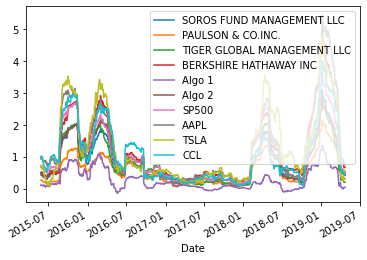

In [64]:
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [65]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio_st = (combine_stock.mean()*252)/(combine_stock.std()*np.sqrt(252))
sharpe_ratio_st.head()

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.360829
dtype: float64

<AxesSubplot:>

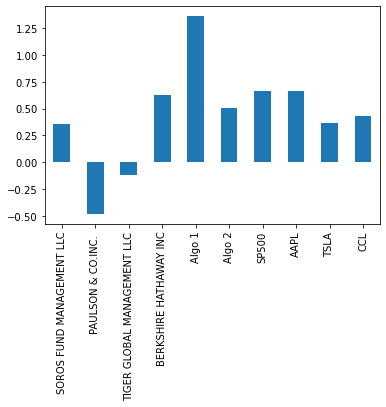

In [66]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_st.plot.bar()

### How does your portfolio do?

Write your answer here!

In [67]:
performance = "my portfolio performed great with a good return compare to others"
print(performance)

my portfolio performed great with a good return compare to others
